In [33]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize

### d) Logistic regression

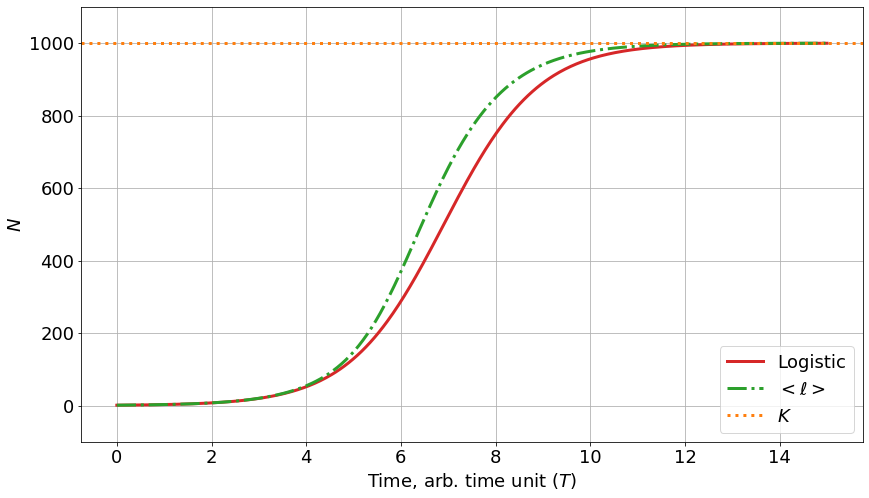

In [45]:
def log_reg(t, alpha, K):
    return K*np.exp(alpha*t) / ( K-1 + np.exp(alpha*t) )

def l_exp(t, alpha, K):
    return np.exp(alpha*t) * ( 1 - (1-np.exp(-alpha*t))**K )

K = 1000  # Maximum number of particles
alpha = 1  # division rate - divisions per unit of time
t = np.linspace(0,15, 500)

# Plot
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(t, log_reg(t, alpha, K), color='C3', linewidth=3, label="Logistic")
ax.plot(t, l_exp(t, alpha, K), color='C2', linestyle="-.", linewidth=3, label=r'$<\ell>$')
ax.axhline(K, color='C1', linewidth=3, alpha=1, linestyle=':', label=r'$K$')
ax.set_xlabel(r'Time, arb. time unit $(T)$')
ax.set_ylabel(r'$N$')
ax.legend(loc='best')
ax.set_ylim(-100, 1100)
ax.grid()
plt.savefig("problem4d.png")

### e) Numerical solution

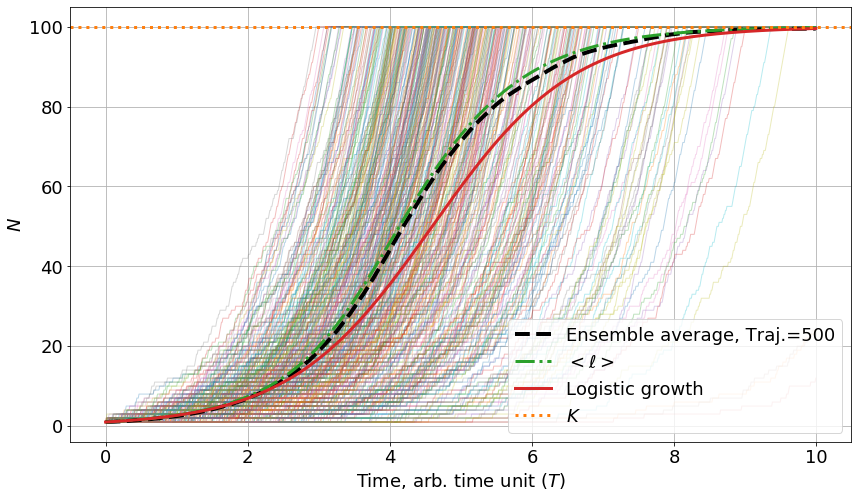

In [46]:
# Just using numbers
# Declarations
K = 100
traj = 500
N = 1000
l = np.zeros((N, traj))  # Number of particles
alpha = 1  # one division per unit of time
deltat = 1/(K*alpha)  # Such that Pk = k*alpha*deltat = 1

t = np.array( [i*deltat for i in range(N)] ) 

# Initialize system
l[0,:] = 1  # One particle at the beginning

for i in range(0,len(t)-1):
    # Calculate for all states up to K-1 at the same time
    sigma = np.random.uniform(0,1, traj)
    Pjump = l[i,:]*alpha*deltat
    increase = np.where(Pjump >= sigma)[0]
    no_increase = np.where(Pjump < sigma)[0]

    l[i+1, increase] = l[i,increase]+(1 - np.floor(l[i,increase]/K))
    l[i+1, no_increase] = l[i, no_increase]
      
# Plot
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(t, l, linewidth=1, alpha=0.3)
ax.plot(t, np.mean(l, axis=1), linewidth=4, linestyle='--', color='k', label=f'Ensemble average, Traj.={traj}')
ax.plot(t, l_exp(t, alpha, K), color='C2', linestyle="-.", linewidth=3, label=r'$<\ell>$')
ax.plot(t, log_reg(t, alpha, K), color='C3', linewidth=3, label="Logistic growth")
ax.axhline(K, color='C1', linewidth=3, alpha=1, linestyle=':', label=r'$K$')
ax.grid()
ax.set_xlabel(r'Time, arb. time unit $(T)$')
ax.set_ylabel(r'$N$')
ax.legend(loc='lower right')
plt.savefig("problem4e.png")